# Coding support sheet

The aim of this document is to show you some functions and how they can be used. This should help you with learning how to manipulate data - both the arrays and dataframes that we are using each week in class. These will be run on a basic dataframe to show you how they are used, and what the resulting output is.

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme()

### Import and inspect data
df2=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/heartAttack.csv')

df = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/fruitsAndVeg.csv')

## Pandas Functions

Pandas is a library that allows effective use of dataframes (similar to excel sheets). Using Pandas, we can do a variety of things that you will see below.

In this cheat sheet, we will take a short hand for any data frame -- dataframe `df`

#### `df.head()` and `df.tail()`
- these functions show you the *first five* and *last five* rows of your dataframe, respectively
- if you add a number inside the brackets, you can change how many rows you see (e.g. `df.head(10)`)

In [2]:
display(df.head())
display(df.tail())

,name,type,colour
0,lettuce,veg,green
1,cucumber,veg,green
2,orange,fruit,orange
3,banana,fruit,yellow
4,kiwi,fruit,brown


,name,type,colour
7,carrot,veg,orange
8,potato,veg,white
9,lychee,fruit,white
10,plum,fruit,purple
11,apple,fruit,green


#### `df.shape`
- this function allows us to look at the dimensions (or shape) of a dataframe
- it tells us how many rows and how many columns we have in the data

In [3]:
df.shape # this dataframe has 12 rows and 3 columns

(12, 3)

#### `df.columns`
- this function lets us look at the names of the columns we have in the data
- you can also use it to *set* column names too

In [4]:
display(df.columns)
df.columns = ['Name', 'Type', 'Colour'] #we can pass a list (that has the same number of items as there are columns) and give the columns new names
display(df.columns)

Index(['name', 'type', 'colour'], dtype='object')

Index(['Name', 'Type', 'Colour'], dtype='object')

### Indexing dataframes
- indexing describes how we subset specific parts of a dataframe, and can be done in a few different ways, namely:
    - `df.loc[]`
    - `df.iloc[]`
    - `df.query()`
    - `df.column_name`
    - `df['column_name']`

In [5]:
# df.loc is primarily label based. we can use the names of columns to take specific columns, e.g.:
#df.loc[:,'Type']
display(df.loc[:,'Type'])
# the : is a shorthand for 'all', and lets us select all rows observations of the 'Type' column

0       veg
1       veg
2     fruit
3     fruit
4     fruit
5     fruit
6       veg
7       veg
8       veg
9     fruit
10    fruit
11    fruit
Name: Type, dtype: object

In [6]:
df.loc[:4,'Type'] #you can also specify rows you want to see (like the first 5 rows)

0      veg
1      veg
2    fruit
3    fruit
4    fruit
Name: Type, dtype: object

##### query allows us to _filter_ a dataframe and get only rows where a condition is met

some caveats:
- you need to pass a query (a request) to the function that comes as a string using quote marks `'`
    - e.g. `df.query('Color == "orange"')`
    - when you want to filter and your variable can be a string, you should put it in speech marks `"` as above

In [7]:
display(df.query('Colour == "orange"'))
display(df.query('Type == "veg"'))
# this function will give you the subset of rows where your condition is met
# it is nice for taking only parts of your data (e.g. only one value of a categorical variable)
# or dropping all rows you want to exclude based on a column that marks things for removal

,Name,Type,Colour
2,orange,fruit,orange
7,carrot,veg,orange


,Name,Type,Colour
0,lettuce,veg,green
1,cucumber,veg,green
6,onion,veg,brown
7,carrot,veg,orange
8,potato,veg,white


an alternative to this that you have already seen is using the `df[column_name]` syntax to subset the dataframe

e.g. `df[df['Type'] == 'veg']`

as you can see in the cell below, this is equivalent to using the inbuilt query function. The major drawbacks to this method are that there are more parts you can make mistakes on (brackets etc), and that pandas functions can be 'chained' and multiple used at the same time

In [8]:
df[df['Type']=='veg']

,Name,Type,Colour
0,lettuce,veg,green
1,cucumber,veg,green
6,onion,veg,brown
7,carrot,veg,orange
8,potato,veg,white


you can get variables from a specific column just using its column name
- this takes it down from a 2-D data frame (rows x columns) to a _series_ or 1-D array

In [9]:
display(df.Colour) #it looks like a dataframe with just one column
display(df.Colour.shape) #but when you look at its shape, there is only one dimension
display(df.Colour[:5]) #and you can treat it like an array, getting specific values

0      green
1      green
2     orange
3     yellow
4      brown
5        red
6      brown
7     orange
8      white
9      white
10    purple
11     green
Name: Colour, dtype: object

(12,)

0     green
1     green
2    orange
3    yellow
4     brown
Name: Colour, dtype: object

In [10]:
display(df['Colour'])
display(df['Colour'].shape)
display(df['Colour'][:5])
# as you can see, these are equivalent to the methods in the cell above

0      green
1      green
2     orange
3     yellow
4      brown
5        red
6      brown
7     orange
8      white
9      white
10    purple
11     green
Name: Colour, dtype: object

(12,)

0     green
1     green
2    orange
3    yellow
4     brown
Name: Colour, dtype: object

### Creating new columns

There are two main ways of creating a new column:

- `df['column_name'] = `
- `df.assign`

In [11]:
df['length'] = 0
display(df.head())

df['length'] = [1,4,5,6,2,4,3,0,1,4,3,2]
display(df.head())
#when specifying an array, it should have the same length as the number of rows in the dataframe

,Name,Type,Colour,length
0,lettuce,veg,green,0
1,cucumber,veg,green,0
2,orange,fruit,orange,0
3,banana,fruit,yellow,0
4,kiwi,fruit,brown,0


,Name,Type,Colour,length
0,lettuce,veg,green,1
1,cucumber,veg,green,4
2,orange,fruit,orange,5
3,banana,fruit,yellow,6
4,kiwi,fruit,brown,2


#### Using `df.assign`

with the `df.assign`, you specify the name and a value, for example:
`df.assign(length = 0)` will create a new column called 'length' and set every value of it to 0

overall, the syntax is: `df.assign(column_name = value_or_values)`

In [12]:
df = df.assign(length2 = 0)
display(df.head())

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,0
1,cucumber,veg,green,4,0
2,orange,fruit,orange,5,0
3,banana,fruit,yellow,6,0
4,kiwi,fruit,brown,2,0


rather than just giving the column one single value, we can also use `assign` and supply an array of values to put into our dataframe!

this is nice if you are wanting to simulate data

In [13]:
lengths = np.random.randint(low = 1, high = 20, size = len(df))
display(lengths) #we have created 12 random numbers to assign as the length of the foods

df = df.assign(length2 = lengths) #we can now give each row these random numbers
display(df.head())

array([ 9, 13, 13,  4, 15, 17,  5,  8, 19,  9, 18, 19])

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,9
1,cucumber,veg,green,4,13
2,orange,fruit,orange,5,13
3,banana,fruit,yellow,6,4
4,kiwi,fruit,brown,2,15


### Sampling from a dataframe (e.g. if bootstrapping)

Pandas has an in-built function that allows you to sample from a dataframe: `df.sample()`

With this function, you can either:
- specify a number of rows to randomly sample using the 'n' option:
    - e.g. `df.sample(n = 30)` will sample 30 random rows from the dataframe `df`
- specify a fraction of the dataframe to sample using the 'frac' option:
    - e.g. `df.sample(frac = 0.75)` will return 75% of rows, selected randomly

Note: by default, this does not 'replace' a row once it's selected -- this prevents you from sampling the same row more than once.

In [14]:
df.sample(n=4) #selects 4 random rows to keep

,Name,Type,Colour,length,length2
6,onion,veg,brown,3,5
10,plum,fruit,purple,3,18
3,banana,fruit,yellow,6,4
2,orange,fruit,orange,5,13


In [15]:
df.sample(frac = 0.3) #selects 30% of rows (in this case, 4 rows) to keep

,Name,Type,Colour,length,length2
4,kiwi,fruit,brown,2,15
1,cucumber,veg,green,4,13
8,potato,veg,white,1,19
0,lettuce,veg,green,1,9


## Grouping data

Grouping data is important to do. It allows us to group data that are similar along a dimension (for example, group parts of our dataset by their type - veg or fruit) and do something with that grouped data

In practice, this is useful in psychology experiments as it allows us to do the same thing across many participants by grouping based on a participant ID. When analysing other types of data, it helps us get statistics by grouping based on categorical variables

`df.groupby` has some important syntax that is useful to understand:
- `by` : the columns which you want to group by. this can be a single column (e.g. `df.groupby('Type')` or a list of columns (e.g. `df.groupby(['Type', 'Colour'])`). 
    - Note that if you are grouping by multiple variables, you need to put them in a list!
- `as_index` : this specifies whether the grouping variables are stored as row indices (probably not ideal).
    - By default this is set to 'True', but you will more often than not want to specify that this is infact `False`
    - By setting it to False, the values of your grouping variable are included as *columns* in your data which makes it much easier for plotting. _**This is more useful for what you are doing**_

calling `df.groupby()` won't return something you can view easily, but gives you something you can do things with (see below)

In [16]:
df.groupby('Type')

In [17]:
df.groupby('Type').size() #we can group by type, and see how many instances of the veg/fruit types we have

Type
fruit    7
veg      5
dtype: int64

In [18]:
display(df.groupby(['Type', 'Colour']).size())
df.groupby(['Type', 'Colour']).size().columns
# as you can see, this spits out an error because 'Type' and 'Colour' are indices not columns
# the actual output displayed is a pandas series, not a dataframe


Type   Colour
fruit  brown     1
       green     1
       orange    1
       purple    1
       red       1
       white     1
       yellow    1
veg    brown     1
       green     2
       orange    1
       white     1
dtype: int64

AttributeError: 'Series' object has no attribute 'columns'

In [19]:
display(df.groupby(['Type', 'Colour'], as_index=False).size())
# this outputs a dataframe, where we can see that type and colour are left in as columns instead.
df.groupby(['Type', 'Colour'], as_index=False).size().columns # and we can see that they are columns

#so generally when using the 'groupby' function, make sure to set as_index = False

,Type,Colour,size
0,fruit,brown,1
1,fruit,green,1
2,fruit,orange,1
3,fruit,purple,1
4,fruit,red,1
5,fruit,white,1
6,fruit,yellow,1
7,veg,brown,1
8,veg,green,2
9,veg,orange,1


Index(['Type', 'Colour', 'size'], dtype='object')

## Aggregating data

This describes how we can apply a function over our data, creating aggregate (summary) measures. You have done this already by now, getting the mean of a variable, for example.

Some functions are relatively straightforward based on their name, and there is a slightly different (but potentially more useful) way of doing it too:

- `df.mean()`   -  gets the mean
- `df.median()` - gets the median
- `df.var()` - gets the variance
- `df.std()` - gets the standard deviation
- `df.min()` - gets the minimum value
- `df.max()` - gets the maximum value
- `df.describe()` - gets descriptive statistics across a variety of data types, good for a first look
    - this by default only takes numeric variables, but you can summarise others by using `df.describe(include='all')` 

some of these functions won't work on some data types (for example, mean will not work on string values). These functions work well with the `groupby` function too!

In [20]:
display(df.mean()) #see that this cuts out non-numeric variables :(

/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_57161/2665821020.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.mean()) #see that this cuts out non-numeric variables :(


length      2.916667
length2    12.416667
dtype: float64

In [21]:
display(df.describe()) #by default this excludes non-numeric variables
display(df.describe(include='all')) #but we can add them in if we want, and get some other info from them

,length,length2
count,12.000000,12.000000
mean,2.916667,12.416667
std,1.781640,5.350588
min,0.000000,4.000000
25%,1.750000,8.750000
50%,3.000000,13.000000
75%,4.000000,17.250000
max,6.000000,19.000000


,Name,Type,Colour,length,length2
count,12,12,12,12.000000,12.000000
unique,12,2,7,NaN,NaN
top,lettuce,fruit,green,NaN,NaN
freq,1,7,3,NaN,NaN
mean,NaN,NaN,NaN,2.916667,12.416667
std,NaN,NaN,NaN,1.781640,5.350588
min,NaN,NaN,NaN,0.000000,4.000000
25%,NaN,NaN,NaN,1.750000,8.750000
50%,NaN,NaN,NaN,3.000000,13.000000
75%,NaN,NaN,NaN,4.000000,17.250000


### Using `df.agg`

`df.agg` allows you to use different functions on different columns if you wanted to, or apply multiple functions to the same column. this is quite useful to get different statistics in one line of code

This function uses a 'dictionary' object to do so, and follows this general pattern:

`df.agg( {'column_name':'function'} )`

or

`df.agg( {'column_name':['list', 'of', 'functions']} )`

`df.acc( {'column1':'function1', 'column2':'function2} )`

In [22]:
df.agg({'length':'mean'}) #this will output just the mean length across all rows

length    2.916667
dtype: float64

In [23]:
df.agg({'length':['mean', 'std', 'count']})

,length
mean,2.916667
std,1.781640
count,12.000000


In [24]:
df.agg( {'length':'mean', 'Colour':'unique'} )

# for length it tells us the mean length of all items
# for Colour, it outputs the unique values found in that column (not that useful for now, but highlights the point)

length                                             2.916667
Colour    [green, orange, yellow, brown, red, white, pur...
dtype: object

both types of function work well in conjunction with `df.groupby`, but `agg` gives you more options where necessary


In [25]:
df.groupby('Colour').mean()

,length,length2
Colour,,
brown,2.500000,10.000000
green,2.333333,13.666667
orange,2.500000,10.500000
purple,3.000000,18.000000
red,4.000000,17.000000
white,2.500000,14.000000
yellow,6.000000,4.000000


In [26]:
df.groupby('Colour', as_index=False).agg({'length':['mean', 'std', 'var', 'std']})
#this gives us multiple descriptive statistics for the variable of interest in one line

Colour    length                               
               mean       std        var       std
0   brown  2.500000  0.707107   0.500000  0.707107
1   green  2.333333  1.527525   2.333333  1.527525
2  orange  2.500000  3.535534  12.500000  3.535534
3  purple  3.000000       NaN        NaN       NaN
4     red  4.000000       NaN        NaN       NaN
5   white  2.500000  2.121320   4.500000  2.121320
6  yellow  6.000000       NaN        NaN       NaN

 in the Heart Attack dataset example, we can see how this could be really useful

In [27]:
df2.groupby(['SEX', 'DIED'], as_index=False).agg(
    {
        'CHARGES' : ['mean', 'std'],
        'LOS'     : ['mean', 'std', 'count'],
        'AGE'     : ['mean', 'std']   
    }
)
# with this, it becomes easy to add more variables of interest to aggregate,
# or more grouping variables if you are interested in them
# you can apply different functions to different columns if you wanted to

SEX DIED       CHARGES                     LOS                          AGE  \
                    mean          std       mean         std count       mean   
0   F  0.0  10681.360123  6800.453296  11.217979  152.553272  4294  72.654554   
1   F  1.0   7917.134800  7692.358142   4.581486    5.526421   767  77.835724   
2   M  0.0   9732.093270  5975.841230   7.355992    4.439826  7135  62.103308   
3   M  1.0   8521.169542  8526.110850   4.628305    5.817602   643  72.939347   

               
          std  
0  152.430047  
1   10.042033  
2   13.097863  
3   12.347426

 # Numpy functions

Numpy is a python library that has functions that help you deal with arrays, or lists. Here you'll see a few functions in numpy that are really helpful and interact well with pandas dataframes to help you manipulate your data

In [28]:
#lets make an array from a list


arr = [1,4,7,2,8,4,5,2,1,9,20,33,1,55,4,2,4,77,6]
arr = np.array(arr)

### Describing arrays

We can describe arrays with functions similar to pandas:

- `array.mean()` - gets the mean value of the array 
- `np.median(array)` - gets the median value of the array
- `array.var()` - gets the variance of the array
- `array.std()` - gets the standard deviation of the arry
- `array.size`  - gets the size of the array (the number of elements). For a 1-D array, this is its length

## Searching in arrays

Sometimes we want to search arrays to find if certain conditions are met. Numpy has a few functions that are very useful for doing exactly that. These funcions interact with pandas dataframes **really well**, and help us manipulate our data more easily.

- `np.where`
- `np.equal`
- `np.greater` and `np.greater_equal` -- x > y and x >= y
- `np.less` and `np.less_equal` -- x < y and x <= y
- `np.isin`

### `np.where`

`np.where` is a function that we can read easily. it finds "where" elements of an array meet a condition. It has two types of use.

Firstly,
- `np.where(condition)` -- condition usually is something like a logical statement, e.g.:
    - `np.where(df['Type'] == 'veg')` 
    - this outputs a list of indices (locations) where a condition is true.
    - this list of indices can be used to find where this condition is true, and only get those things
        - this is particularly useful when trying to find things in a dataframe!

In [29]:
display(np.where(df['Type'] == 'veg'))
df.loc[np.where(df['Type']=='veg')[0],:]

(array([0, 1, 6, 7, 8]),)

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,9
1,cucumber,veg,green,4,13
6,onion,veg,brown,3,5
7,carrot,veg,orange,0,8
8,potato,veg,white,1,19


### `np.equal`

The `np.where` functions finds us the locations where a condition is met. If you have 12 items and only 3 meet this criteria, it outputs those 3 locations.

`np.equal` is slightly different. It lets you iterate over every element (item) in an array and check to see if those elements are the same as your test. It then outputs an array that is the same length as your original array but each value is either `True` or `False` depending on what the value was. It's syntax is below:

`np.equal(your_array, value_to_test)`

In [30]:
np.equal(df.Type, 'veg')
#as you can see, this is quite different to the output of np.where !

0      True
1      True
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9     False
10    False
11    False
Name: Type, dtype: bool

The logical functions `np.greater`, `np.greater_equal`, `np.less` and `np.less_equal` all use a similar syntax. One important aspect is that they can only work on *numeric* data (not strings). Similar to `np.equal`, the output of this function has the same length as your original array, and contains `True` or `False` values depending on what it found.

They all follow the same syntax as below:

`np.greater(your_array, value)`

note: this is equivalent to `your_array > value` but it is computed faster, and you can treat it as its own object in your code

In [31]:
display(np.greater(df.length2, 4))
display(df.length2>4) # as you can see,these two are equivalent

0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
Name: length2, dtype: bool

0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
Name: length2, dtype: bool

### `np.isin`

`np.isin` does something slightly different. It allows you to check if each element of your array is in a list of different options. It's a slightly more versatile version of `np.equal` and is nice for grouping variables in your dataframes. It's syntax is as follows:

`np.isin(your_array, [list of options])`

This will output an array that has the same length as your original array, set to `True` or `False` depending on whether it met the criteria

In [32]:
display(np.isin(df.Colour, ['orange', 'green']))
display(np.isin(df.Colour, ['yellow', 'white', 'brown']))

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False,  True])

array([False, False, False,  True,  True, False,  True, False,  True,
        True, False, False])

this can then be used to filter a dataframe. If the value is `True` it takes the corresponding row. If the value is `False` it ignores the corresponding row. For example:

In [33]:
df.loc[np.isin(df.Colour, ['orange', 'green'])] #this only takes foods that were orange or green

#checking multiple values isn't possible with normal syntax (note that the code below spits out a nasty error..)
df[df['Colour'] == 'orange' or df['Colour']=='green']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

the error message above can be fixed by using numpy-based *logical statements*

### Logical statements in numpy

numpy has inbuilt functions that let you do logical comparisons between two equally sized arrays. This is nice if you want to have multiple conditions met. The following statements are likely to be useful to you:

- `np.logical_and`
- `np.logical_or`
- `np.logical_not`


#### `np.logical_and`

this looks to see if two criteria are both met. If the two criteria are met, it outputs a `True`. If only one (or neither) are met, it outputs a `False`

In [34]:
#for example, we can take columns of our dataframe and find where two criteria are met
# let's say we wanted to find the rows where the colour of our food object was 'green' and where it was a 'veg' type
display(np.logical_and(df.Colour == 'green', df.Type == 'veg'))

#this interacts nicely with pandas dataframe indexing!
display(df[np.logical_and(df.Colour == 'green', df.Type == 'veg')])
#this outputs only rows where the food item is green and a vegetable

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,9
1,cucumber,veg,green,4,13


as you can imagine, we can do something very similar with a `df.query` call when using dataframes!

In [35]:
display(df.query('Colour == "green" and Type == "veg"'))

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,9
1,cucumber,veg,green,4,13


#### `np.logical_or`

this function looks to see if either one of the criteria is met (rather than both). If either of the criteria are True, its output will be True. If both are False, its output will be False

For example, we can find all instances where the colour of our food is either green _or_ yellow

In [36]:
display(np.logical_or(df.Colour == 'green', df.Colour == 'yellow'))

#and we can use this function to help us filter out data we aren't interested in
df[np.logical_or(df.Colour == 'green', df.Colour == 'yellow')] 

#df[np.logical_or(df['Colour'] == 'green', df['Colour'] == 'yellow')] #this is the same 

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
Name: Colour, dtype: bool

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,9
1,cucumber,veg,green,4,13
3,banana,fruit,yellow,6,4
11,apple,fruit,green,2,19


again, we can get a similar result using a `query` call:

In [37]:
df.query('Colour == "green" or Colour == "yellow"')

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,9
1,cucumber,veg,green,4,13
3,banana,fruit,yellow,6,4
11,apple,fruit,green,2,19


finally....

#### `np.logical_not`

this checks that neither criteria is met. If neither criteria is met, it outputs a `True`. If one or more criteria are met, if outputs a `False`. This is mostly useful for when you want to find where something is _not_ true.

In [38]:
display(np.logical_not(df.Colour == 'green')) #tells us if a value of df.Colour is NOT green
display(df[np.logical_not(df.Colour == 'green')]) #and we can use that boolean (true/false) array to filter our data frame
#note that none of the values for Colour are green!

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
Name: Colour, dtype: bool

,Name,Type,Colour,length,length2
2,orange,fruit,orange,5,13
3,banana,fruit,yellow,6,4
4,kiwi,fruit,brown,2,15
5,strawberry,fruit,red,4,17
6,onion,veg,brown,3,5
7,carrot,veg,orange,0,8
8,potato,veg,white,1,19
9,lychee,fruit,white,4,9
10,plum,fruit,purple,3,18


In [39]:
# again, we can do something equivalet (maybe more straightforward) with a query

df.query('Colour != "green"') #note that != means not equal

,Name,Type,Colour,length,length2
2,orange,fruit,orange,5,13
3,banana,fruit,yellow,6,4
4,kiwi,fruit,brown,2,15
5,strawberry,fruit,red,4,17
6,onion,veg,brown,3,5
7,carrot,veg,orange,0,8
8,potato,veg,white,1,19
9,lychee,fruit,white,4,9
10,plum,fruit,purple,3,18


## Using `numpy.random`

Numpy has a sub-package that is used for doing random things! Not random things, _random_ things. It has functions that enable us to create sequences of random numbers both as integers (whole numbers) and decimals. It also has functions that let us make random choices between items of arrays so we can sample things randomly. Below are some functions that will be useful for you:

- `np.random.randint`
- `np.random.random`
- `np.random.randn`
- `np.random.choice`
- `np.random.shuffle`

#### `np.random.randint`

This function allows us to create an array of random numbers from a specific bound. These numbers are drawn from a _discrete uniform distribution_. That means that there should be an equal probability of getting any number within this bound. It uses the following syntax:

`np.random.randint(low = lower_bound, high = upper_bound, size = number_of_random_numbers_you_want)`
- `low`: the lower bound of your random numbers (e.g. if you wanted the numbers between 10 and 20, you'd set 10)
- `high`: the upper bound of your random numbers. This is **not** inclusive.
    - That means if you wanted the numbers between 10 and 20, your upper bound would be 21
- `size`: the number of samples you wanted to generate




In [40]:
#to get a sample of 1000 numbers randomly drawn from 10 and 20, we would do:
randints = np.random.randint(low = 10, high = 21, size = 1000)
display(randints[:10])

array([17, 14, 13, 18, 19, 10, 20, 15, 10, 10])

(array([104.,  96.,  78.,  93.,  91., 101.,  90., 100.,  75.,  92.,  80.]),
 array([10.        , 10.90909091, 11.81818182, 12.72727273, 13.63636364,
        14.54545455, 15.45454545, 16.36363636, 17.27272727, 18.18181818,
        19.09090909, 20.        ]),
 <BarContainer object of 11 artists>)

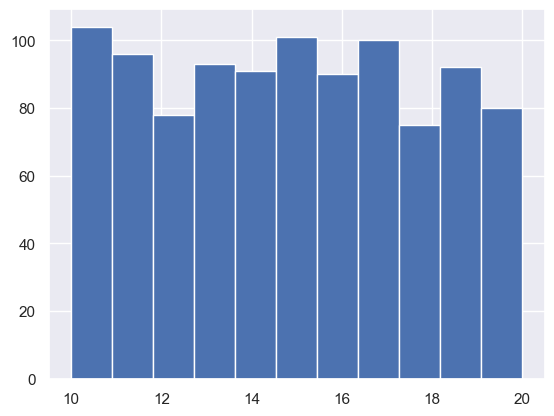

In [41]:
#we can plot this as a histogram to show you
plt.hist(randints, bins = 11) # 11 bins just bcause we have 11 unique values!

#this looks pretty uniform!

#### `np.random.random`

While `np.randint` takes whole numbers in a range of values, `np.random` takes a random number of decimal values within the range 0 and 1. You can choose how many random numbers you generate:

`np.random.random(size = n_samples)`

In [42]:
randfloats = np.random.random(size = 1000)
randfloats[:15]

array([0.36749217, 0.93532443, 0.79328312, 0.82180164, 0.86385785,
       0.36770064, 0.80527383, 0.76189206, 0.08625485, 0.87386351,
       0.03849577, 0.0500301 , 0.91810191, 0.10520093, 0.83598459])

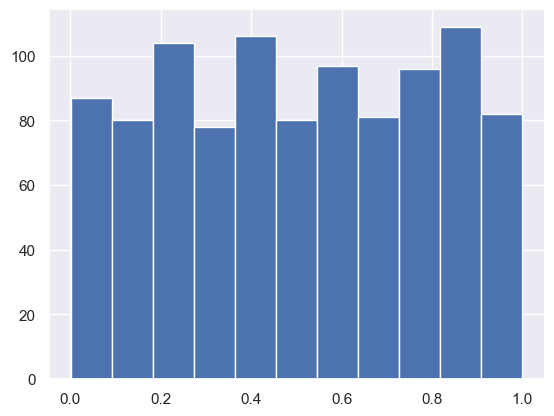

In [43]:
plt.hist(randfloats, bins=11);
#here we can see that it is roughly uniform between 0 and 1

#### `np.random.randn`

This function allows us to draw samples from the _standard normal_ distribution - i.e. a normal distribution with mean = 0 and std = 1. We can draw as many samples as we want by passing a number:

`np.random.randn(1000)`

In [44]:
randnorms = np.random.randn(1000)
randnorms[:15]

array([ 0.80559072,  0.46900481,  0.31017451, -1.35252634,  1.49642797,
        0.61237395,  0.43183374, -1.7193214 ,  0.53727849, -0.92000384,
       -0.42688629,  1.49101009, -0.08610773,  0.29744211, -0.48303494])

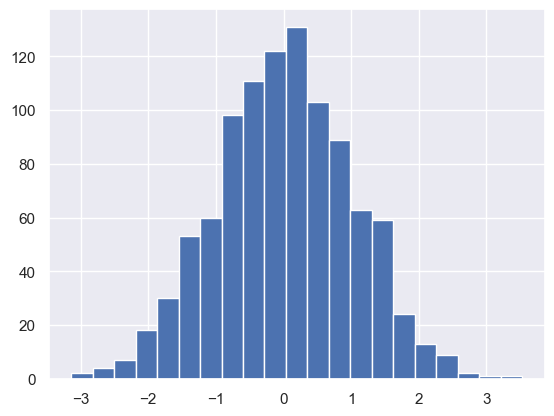

In [45]:
plt.hist(randnorms, bins = 21);
#as you can see, the distribution of these randomly generated numbers is normally distributed and centred on zero

#### `np.random.choice`

The `np.random.choice` function allows us to randomly choose from elements of an array - this is particularly useful for things like bootstrapping. This function takes a few parameters:

`np.random.choice(array, size, replace, p)`
- `array`: this is the array that you want to sample from 
- `size`: the number of samples you want to draw
- `replace`: whether we sample with replacement (i.e. you can sample the same element twice) or without replacement (no duplicates)
- `p`: the probability associated with an element
    - **this is not useful for you now and can be ignored**. By ignoring it, by default each element of your array is equally likely to be sampled.
    - if you set something for p (it must be an array of the same length as your array) then it assigns a probability to each element so you can vary how likely something is to be sampled

array([ 1.44319356, -1.08209552, -0.48303494, -0.20046917,  0.15510191,
       -0.63747085, -1.32850728,  1.09102103, -0.29201184,  0.26282167,
        1.5536981 , -0.81021613,  1.03252248, -0.24121646,  0.25466204])

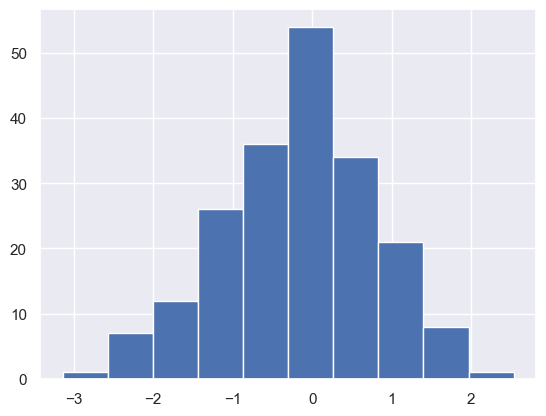

In [46]:
samp_randnorms = np.random.choice(randnorms, 200) #takes 200 random samples from our normally distributed, randomly generated numbers
display(samp_randnorms[:15])
plt.hist(samp_randnorms); #this sample will be roughly normally distributed because our parent distribution is Normal.

#### `np.random.shuffle`

- this function can be used to randomly shuffle the elements of an array
- this is nice if you want to do random permutations of an array and look at differences

note: this function works **in place** -- that means that you do not need to do e.g. `array = np.random.shuffle(array)`. Simply calling `np.random.shuffle(array)` will shuffle the array and you don't need to set the variable to itself again

In [47]:
x = np.random.randint(low = 0, high = 11, size = 10)
display(x)

array([4, 8, 2, 7, 9, 4, 3, 8, 3, 4])

In [48]:
np.random.shuffle(x) #rather than doing x = np.random.shuffle(x)
display(x) #this has shuffled it, randomising the elements in your array

array([0, 6, 7, 9, 5, 8, 6, 5, 8, 0])

## Differences between data types

- this is an extra section that just highlights the difference between the different data types mentioned so far, and how we can convert between them.
- some bits of this may be confusing. It is an extra section that isn't immediately relevant, but good information to have.

## Numpy vs. Pandas

Numpy arrays are an 'efficient' way of storing data within python. The functions that work on them from within the numpy package are optimised to be quick. This doesn't matter when handling small amounts of data, but when you are handling large datasets this quickly becomes incredibly important.


Pandas is a package for dataframe manipulation and has two key data formats.
- 1: Dataframe
- 2: Series

Pandas and numpy are designed to be overlapping, and complement each other well. Here I will highlight the differences (and similarities) between them

In [49]:
# first, lets get a random sample of heights

n = 50
heights = np.random.random(n) +1 #simulate some heights in metres (between 1 and 2 metres, let's say)

In [50]:
heights
# an array is basically just a list of numbers contained within one data structure

array([1.1297021 , 1.78976438, 1.14794526, 1.64391754, 1.48808852,
       1.81864771, 1.10944457, 1.56555431, 1.72126832, 1.53674952,
       1.544403  , 1.4355711 , 1.34506898, 1.43584476, 1.22816796,
       1.73304311, 1.94483411, 1.51089383, 1.15061696, 1.81864828,
       1.26328792, 1.95152586, 1.22871931, 1.21489481, 1.84477962,
       1.83601856, 1.15165385, 1.60018284, 1.33922026, 1.7887086 ,
       1.8568366 , 1.04931024, 1.96911527, 1.84336203, 1.70804633,
       1.52591916, 1.91526118, 1.15723016, 1.7945069 , 1.67290041,
       1.43886242, 1.7336805 , 1.61668215, 1.18590251, 1.43081923,
       1.6290099 , 1.63178879, 1.92623912, 1.7403184 , 1.83740908])

Numpy arrays can be converted to heights very easily, by creating a new dataframe from the array. We can do this and see what it looks like

In [51]:
heights_df = pd.DataFrame(heights)
display(heights_df.head())
display(heights_df.shape)

,0
0,1.129702
1,1.789764
2,1.147945
3,1.643918
4,1.488089


(50, 1)

by default it just creates a dataframe with as many rows as there are items in heights (50), and there is only one column (which has no name, because we didn't set one. Let's set one.

In [52]:
heights_df.columns = ['height']
display(heights_df.head())
display(type(heights_df))

,height
0,1.129702
1,1.789764
2,1.147945
3,1.643918
4,1.488089


pandas.core.frame.DataFrame

When we had the heights as a numpy array, we didn't really have much to help us know what is going on. With dataframes, we can put as much data as we want in (they can have different formats too, like strings or numbers or booleans) and assign headers that let us know what is contained within a column. This lets us store lots of information about individual observations in our dataset very clearly).

Dataframes are different to numpy arrays. A dataframe is basically an excel sheet within python. Each column can have a header (like in excel) and it looks like a big table. An array is just a list of information one after the other. Sometimes we want things in dataframes, sometimes we want things in numpy arrays.

#### pandas series

When we take a single column from a dataframe, it is no longer a dataframe. Pandas call it a _Series_

In [53]:
display(type(heights_df.height))
heights_df.height.head()

pandas.core.series.Series

0    1.129702
1    1.789764
2    1.147945
3    1.643918
4    1.488089
Name: height, dtype: float64

A pandas series and a numpy array are very, very similar. As we can see, it is just a list of the values for that column. Pandas series and numpy arrays have slightly different functions built in. You can use a pandas series as the input to any numpy function and it will basically make it into a numpy array, do the function, then output a numpy array.


Because Pandas structures and Numpy arrays are two different data structures, they have slightly different syntax for doing things. For example:

- If you want to sample a dataframe randomly, you can use `df.sample(n = 10)` to randomly select 10 rows. If you wanted to randomly sample a numpy array, you would need to use `np.random.choice(array, 10)`.
- If you wanted to get the median, you would use `df.median()`, whereas to get the median of a numpy array you need to use `np.median(array)`.
- If you wanted to get the unique values for a dataframe column you would use `df.column.unique()`. For a numpy array, you would use `np.unique(array)`.

Broadly speaking, there are equivalent ways of doing things between the two data structures, but they are slightly different.

### Moving between pandas and numpy

As the two packages are similar, we can move between them pretty easily.

#### Going from Numpy -> Pandas
- we can create a dataframe from an array simply by calling:
    - `dataframe = pd.DataFrame(array, columns = ['list', 'of', 'column', 'names'])`
    - the list of column names needs to be as long as the number of columns in your array if it is a 2-D array
    
    
#### Going from Pandas -> Numpy
- we can turn a dataframe into a numpy array by calling:
    - `df.to_numpy()` 

In [54]:
display(df.head())
display(df.to_numpy())
display(df.to_numpy().shape)

,Name,Type,Colour,length,length2
0,lettuce,veg,green,1,12
1,cucumber,veg,green,4,3
2,orange,fruit,orange,5,12
3,banana,fruit,yellow,6,10
4,kiwi,fruit,brown,2,19


array([['lettuce', 'veg', 'green', 1, 12],
       ['cucumber', 'veg', 'green', 4, 3],
       ['orange', 'fruit', 'orange', 5, 12],
       ['banana', 'fruit', 'yellow', 6, 10],
       ['kiwi', 'fruit', 'brown', 2, 19],
       ['strawberry', 'fruit', 'red', 4, 11],
       ['onion', 'veg', 'brown', 3, 6],
       ['carrot', 'veg', 'orange', 0, 4],
       ['potato', 'veg', 'white', 1, 13],
       ['lychee', 'fruit', 'white', 4, 18],
       ['plum', 'fruit', 'purple', 3, 4],
       ['apple', 'fruit', 'green', 2, 17]], dtype=object)

(12, 5)

As you can see, this converts the 12 x 5 dataframe into a 12 x 5 numpy array, where each row of the numpy array was a row of the dataframe. We lose the header information doing this, so have to try to guess it (another benefit to pandas dataframes!

We can also take individual columns from our dataframe and turn them into a numpy array. This is used quite commonly when you need just the one variable and want to do something with it

To do this, we would do: `df.column_name.to_numpy()`

In [55]:
df.length2.to_numpy()

array([12,  3, 12, 10, 19, 11,  6,  4, 13, 18,  4, 17])

In [56]:
df.length2.to_list() #and we can also make individual columns into lists if you wanted to

[12, 3, 12, 10, 19, 11, 6, 4, 13, 18, 4, 17]